## Modelling Notebook

This notebook is to be used for testing out the various models that you want to use. No preprocessing will be done in this notebook. Steps:

1. Read in `data/final_data.csv` that you created in the `Data Cleaning.ipynb`
2. Try various models and print appropriate metrics (accuracy/MSE etc)
3. Pick a final model and save it as `models/model.pkl`

Importing necessary Libraries

In [35]:
import numpy as np 
import pandas as pd

In [36]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import seaborn as sns

In [37]:
df=pd.read_csv(r"C:\Users\subra\Downloads\final_dataset.csv")
df.head()
df.info()

,Unnamed: 0,index,Category,Message
0,0,0,ham,"Go until jurong point, crazy.. Available only ..."
1,1,1,ham,Ok lar... Joking wif u oni...
2,2,2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,3,3,ham,U dun say so early hor... U c already then say...
4,4,4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [38]:
stemmer=PorterStemmer()
bog=CountVectorizer()
tfidf=TfidfVectorizer()

In [39]:
final=[]

Converting all the texts into word vector

In [40]:
for i in range(len(df)):
    words=re.sub('[^a-zA_Z]',' ',df['Message'][i])
    words=words.lower()
    words=words.split()
    words=[stemmer.stem(word) for word in words if word not in set(stopwords.words('english'))]
    final.append(' '.join(words))

In [41]:
len(final)

5157

Transforming the Categorical targets into numerical values

In [42]:
X=bog.fit_transform(final).toarray()

In [43]:
X.shape

(5157, 6359)

In [44]:
le=LabelEncoder()

In [45]:
df['Category']=le.fit_transform(df['Category'])

In [46]:
y=df['Category']

In [47]:
y.shape

(5157,)

In [48]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [50]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((3609, 6359), (3609,), (1548, 6359), (1548,))

Model Creation

In [51]:
mnb=MultinomialNB()
mnb.fit(X_train,y_train)
y_pred=mnb.predict(X_test)

<AxesSubplot:>

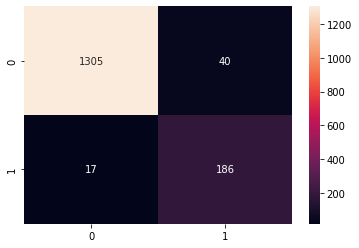

In [52]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='.0f')

In [53]:
accuracy_score(y_test,y_pred)

0.9631782945736435

In [54]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1345
           1       0.82      0.92      0.87       203

    accuracy                           0.96      1548
   macro avg       0.91      0.94      0.92      1548
weighted avg       0.97      0.96      0.96      1548

